# TRANSFORMACIONES GEOMÉTRICAS CON IMÁGENES

Instalación ```cv2```     

```
pip install opencv-contrib-python
```

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# comando de Jupyter para que las imágenes se muestren automáticamente 
%matplotlib inline
#configuracion necesaria de pyplot para ver las imagenes en escala de grises
plt.rcParams['image.cmap'] = 'gray'

## 1. ESCALADO

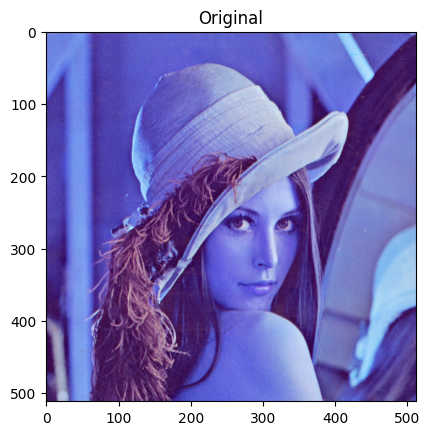

In [3]:
src = cv2.imread('./img/lena.png')
dst = cv2.resize(src, (256, 256), interpolation=cv2.INTER_CUBIC)

# cv2.imshow('./img/lena.png', src)
# cv2.imshow('Scale', dst)
# cv2.waitKey()
plt.title('Original')
plt.imshow(src,vmin=0,vmax=1)

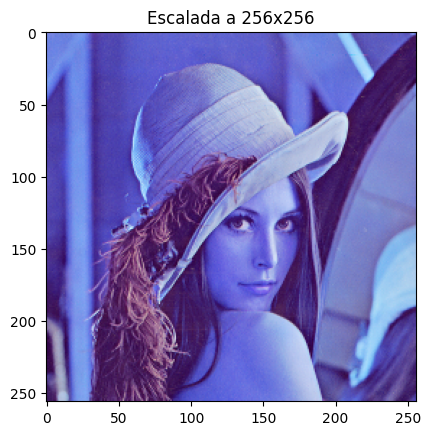

In [4]:
plt.title('Escalada a 256x256')
plt.imshow(dst,vmin=0,vmax=1)

No es necesario indicar el tamaño explícitamente, se puede indicar un factor de escala tanto para el ancho como para la altura, por ejemplo, si se quiere que la imagen tenga el 70% de su tamaño original se puede hacer de este modo:

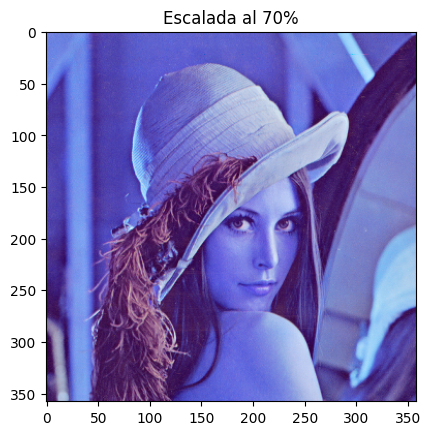

In [5]:
dst = cv2.resize(src, None, fx=0.70, fy=0.70, interpolation=cv2.INTER_CUBIC)

plt.title('Escalada al 70%')
plt.imshow(dst,vmin=0,vmax=1)

Si no se indica el tamaño se utilizan los parámetros fx y fy, si el tamaño se establece estos parámetros son calculados a partir de lo que hayamos establecido.

## 2. TRASLACIÓN 

Para realizar esta transformación no contamos con una función específica, para esta tarea usaremos **cv2.warpAffine()** que nos permite aplicar transformaciones afines a una imagen, la transformación que se desee aplicar esta determinada por la correspondiente matriz. Una traslación esta definida por la siguiente matriz:

$$T = \begin{bmatrix} 1 & 0 & t_{x} \\ 1 & 0 & t_{u} \end{bmatrix}$$

Los valores de *tx* y *ty* definen la nueva posición en *x* e *y* respectivamente, de cada pixel.

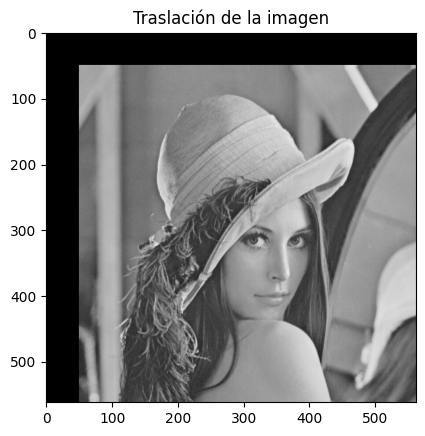

In [6]:
src = cv2.imread('lena_gris.jpg')

M = np.float32([[1, 0, 50], [0, 1, 50]])
dst = cv2.warpAffine(src, M, (512+50,  512+50))

# cv2.imshow('lena.jpg', src)
# cv2.imshow('Traslación', dst)
# cv2.waitKey()

plt.title('Traslación de la imagen')
plt.imshow(dst,vmin=0,vmax=1)

## 3. Rotación

Para rotar una imagen se usa la misma función que para la traslación, solo se debe cambiar la matriz. Anteriormente creamos la matriz manualmente dado que era sencilla. En este caso, la matriz de rotación puede ser algo más compleja por lo que se utiliza la función proporcionada por OpenCV **cv2.getRotationMatrix2D()** para crearla. A dicha función se le debe indicar el *punto pivote*(centro imagen) sobre el que se realiza el giro o rotación, el *ángulo* (45º) y el *factor de escala* (1).

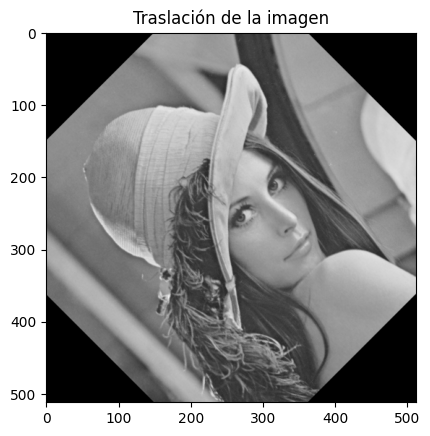

In [7]:
src = cv2.imread('./img/lena_gris.jpg')
rows, cols = src.shape[:2]

M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
dst = cv2.warpAffine(src, M, (cols, rows))

# cv2.imshow('./img/lena_gris.jpg', src)
# cv2.imshow('Rotación', dst)
# cv2.waitKey()

plt.title('Traslación de la imagen')
plt.imshow(dst,vmin=0,vmax=1)

## 3. Inclinación

La inclinación se puede aplicar sobre el eje X, Y o ambos si lo deseamos así, al igual que las transformaciones previas debemos definir la siguiente matriz:
$$I = \begin{bmatrix} 1 & \theta_{x} & 0 \\ \theta_{y} & 1 & 0 \end{bmatrix}$$

En el siguiente ejemplo se agrega una inclinación de 20 grados en el eje X y de 15 grados en el eje Y. Si se quiere inclinar solamente en X establecemos Y a cero o viceversa.

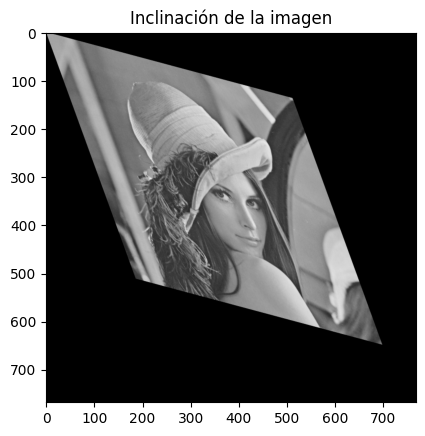

In [8]:
import math

src = cv2.imread('./img/lena_gris.jpg')
rows, cols = src.shape[:2]

ix = math.tan(20 * math.pi / 180)
iy = math.tan(15 * math.pi / 180)

M = np.float32([[1, ix, 0], [iy, 1, 0]])

dst = cv2.warpAffine(src, M, (cols + 256, rows + 256))

plt.title('Inclinación de la imagen')
plt.imshow(dst,vmin=0,vmax=1)

## 4. Transformación en perspectiva

Esta transformación se calcula de manera similar a la anterior solo que deberemos indicar 4 puntos y usaremos las funciones **cv2.getPerspectiveTransform()** para obtener la matriz y **cv2.warpPerspective()** para aplicar la transformación.

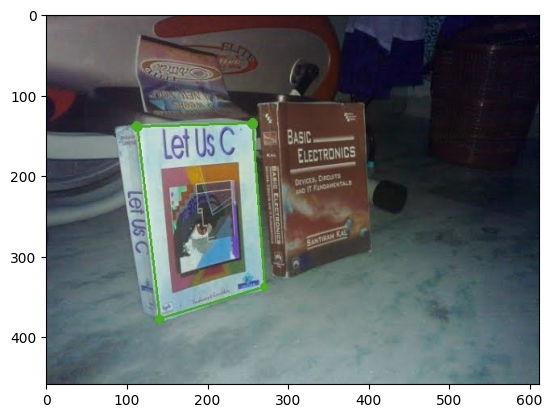

In [ ]:
# Imagen de entrada para transformación en perspectiva
src = cv2.imread('./img/left.jpg')
plt.imshow(src,vmin=0,vmax=1)

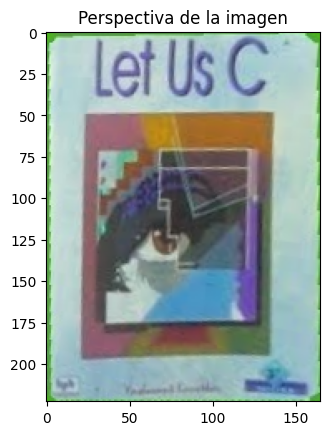

In [11]:
src = cv2.imread('./img/left.jpg')
rows, cols = src.shape[:2]

pts1 = np.float32([[113, 137], [256, 136], [270, 337], [140, 377]])
pts2 = np.float32([[0, 0], [165, 0], [165, 223], [0, 223]])

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(src, M, (165, 223))


plt.title('Perspectiva de la imagen')
plt.imshow(dst,vmin=0,vmax=1)

La primera serie de puntos es usada para definir el rectángulo que conforma el libro.
La segunda serie de puntos indica el rectángulo de destino en que deseamos ubicar el primer rectángulo, en este ejemplo logramos obtener una imagen de la portada del libro en perspectiva. 